<center><h1>Proyecto final</h1></center>
<center><h3>IBM SkillsBuild Europa - Análisis de datos</h3></center>

# Requisitos



* Conocimientos de Python, Power BI o Tableau.
* Comprensión de la limpieza de datos.
* Comprensión de la visualización de datos.



#### Nivel de ejercicio: Intermedio



#### Duración: aproximadamente 3 horas


### Análisis de datos de Airbnb:



#### Objetivo:



En este ejercicio, practicarás el análisis de datos sobre un conjunto de datos abiertos procedentes de Airbnb. Algunas de las tareas incluyen:

- limpieza de datos,
- transformación de datos y
- visualización de datos.



#### Resumen sobre los datos de Airbnb:



Los criterios principales de la gente cuando visita lugares nuevos son contar con alojamiento y comida a precios razonables. Airbnb (Air-Bed-Breakfast) es un mercado en línea creado para satisfacer esta necesidad, pues permite a la gente alquilar sus casas durante plazos cortos. Estos servicios se ofrecen a un precio relativamente inferior al de los hoteles y en diversas ubicaciones geográficas. Además, personas de todo el mundo prefieren el servicio hogareño y económico.



#### Fuente de los datos



Puedes obtener el <i>dataset</i> para realizar este proyecto en el siguiente enlace: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata



Este <i>dataset</i> contiene información sobre los alojamientos, tal como el barrio, el tipo de habitación, el precio, la disponibilidad, las opiniones, los gastos de servicio, la política de cancelación y las normas de uso de la casa.



¡Te deseamos lo mejor en tu análisis de los datos de Airbnb!

## Tarea 1: Carga de datos (Python)



1. Lee el fichero csv y cárgarlo en un <i>dataframe</i> de pandas.
2. Visualiza las cinco primeras filas de tu <i>dataframe</i>.
3. Visualize los tipos de datos de las columnas.

**1** Lee el fichero csv y cárgarlo en un dataframe de pandas.

In [249]:
## Leer el fichero csv y cárgarlo en un dataframe de pandas.
import os
import pandas as pd

# Comprobar ruta / path
dir = os.getcwd()

# Construir ruta del fichero absoluta (absolute path)
try:
  file_path = dir + "/Airbnb_Open_Data.csv"
except:
  print(f'The file {file_path} does not exist.')

# Asegurarnos de la existencia del fichero
if os.path.exists(file_path):
  print(file_path)

  ## Crear un DataFrame del CSV
  df = pd.read_csv('Airbnb_Open_Data.csv', low_memory=False)



/Users/yorgopetsas/Desktop/DataAnalisisCourse/Proyecto_Final/Airbnb_Open_Data.csv


**2** Visualiza las cinco primeras filas de tu dataframe.

In [210]:
## Mostrar el Head / Primeras 5 filas
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


**3** Visualize los tipos de datos de las columnas.

In [211]:
## Mostrar los tipos de datos y los valores nullos con 'df.info()' o 'df.dtypes'
df.dtypes


id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Tarea 2a: Limpieza de datos (cualquier herramienta)


1. Elimina las columnas no deseadas del <i>dataframe</i>, entre ellas se incluyen `host id`, `id`, `country` y `country code`.
2. Indica la razón por la cual se han eliminado estas columnas para tu análisis de datos.


Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla tomadas antes y después de eliminar las columnas.

1. Eliminamos las columnas no deseadas

In [212]:
## Eliminar columnas no deseadas
df.drop(columns = ["host id", "id", "country", "country code"], axis=1, inplace=True)

In [213]:
## Confirmar el cambio visualizando las columnas
df.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'house_rules',
       'license'],
      dtype='object')

2. Las columnas no son necesarias para el analisis y las eliminamos para hacer más facil y ligero el manejo de datos.

## Tarea 2b: Limpieza de datos (Python)


- Compueba si hay valores nulos y muestra el recuento en orden ascendente. **Si faltan valores, imputa los valores como consideres.**
- Comprueba si hay valores duplicados y elimínalos.
- Muestra el número total de registros antes y después de eliminar los duplicados.

In [214]:
## Visualizar la cuenta de campos con valor null por cada columna en orden ascendente.
df.isnull().sum().sort_values(ascending=True)


room type                              0
lat                                    8
long                                   8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
number of reviews                    183
Construction year                    214
price                                247
NAME                                 250
service fee                          273
host_identity_verified               289
calculated host listings count       319
review rate number                   326
host name                            406
minimum nights                       409
availability 365                     448
reviews per month                  15879
last review                        15893
house_rules                        52131
license                           102597
dtype: int64

In [215]:
## Inputar valores null por columna
for col in df.columns:
  if df[col].dtype == 'O':
    df[col].fillna(value=df[col].mode()[0], inplace=True)
  else:
    df[col].fillna(value=df[col].median(), inplace=True)


In [216]:
## Confirmar la falta de campos nulos
df.isnull().sum().sort_values(ascending=True)

NAME                              0
availability 365                  0
calculated host listings count    0
review rate number                0
reviews per month                 0
last review                       0
number of reviews                 0
minimum nights                    0
service fee                       0
price                             0
Construction year                 0
room type                         0
cancellation_policy               0
instant_bookable                  0
long                              0
lat                               0
neighbourhood                     0
neighbourhood group               0
host name                         0
host_identity_verified            0
house_rules                       0
license                           0
dtype: int64

Mostrar número total de registros

In [217]:
df.shape

(102599, 22)

Comprobar si hay duplicados y eliminarlos.

In [218]:
## Comprobar si hay valores duplicados y elimínalos.
df.duplicated().sum()

## Eliminar
df.drop_duplicates(inplace=True)

## Confirmar
df.duplicated().sum()

0

In [219]:
## Número total de registros después de eliminar los duplicados.

df.shape

(99138, 22)

## Tarea 3: Transformación de datos (cualquier herramienta)





- Cambia el nombre de la columna `availability 365` a `days_booked`.
- Convierte todos los nombres de columna a minúsculas y sustituye los espacios en los nombres de columna por un guión bajo "_".
- Elimina el signo de dólares y la coma de las columnas `price` y `service_fee`. Si es necesario, convierte estas dos columnas al tipo de datos adecuado.



Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla de tu trabajo.

In [220]:
## Cambiar el nombre de la columna.
df.rename(columns={'availability 365': 'days_booked' }, inplace=True)

In [221]:
## Confirmar nuevos nombres
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99138 entries, 0 to 102057
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME                            99138 non-null  object 
 1   host_identity_verified          99138 non-null  object 
 2   host name                       99138 non-null  object 
 3   neighbourhood group             99138 non-null  object 
 4   neighbourhood                   99138 non-null  object 
 5   lat                             99138 non-null  float64
 6   long                            99138 non-null  float64
 7   instant_bookable                99138 non-null  bool   
 8   cancellation_policy             99138 non-null  object 
 9   room type                       99138 non-null  object 
 10  Construction year               99138 non-null  float64
 11  price                           99138 non-null  object 
 12  service fee                     9913

In [222]:
## Conviertir todos los nombres de columna a minúsculas y sustituye los espacios por un guión bajo "_".
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [223]:
## Confirmar nuevos nombres
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99138 entries, 0 to 102057
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            99138 non-null  object 
 1   host_identity_verified          99138 non-null  object 
 2   host_name                       99138 non-null  object 
 3   neighbourhood_group             99138 non-null  object 
 4   neighbourhood                   99138 non-null  object 
 5   lat                             99138 non-null  float64
 6   long                            99138 non-null  float64
 7   instant_bookable                99138 non-null  bool   
 8   cancellation_policy             99138 non-null  object 
 9   room_type                       99138 non-null  object 
 10  construction_year               99138 non-null  float64
 11  price                           99138 non-null  object 
 12  service_fee                     9913

In [224]:
## Eliminar el signo de dólares y la coma de las columnas. Si es necesario, convierte estas dos columnas al tipo de datos adecuado.
import numpy as np

## Definir funcción que elimina el signo dolar en una columna
def remove_dollar_sign(value):
  if pd.isna(value):
    return np.NaN
  else:
    return float(value.replace("$", "").replace(",",""))


In [225]:
## Llamar a la funcción "remove_dollar_sign" para eliminar el signo de la columna 'price'
df['price'] = df['price'].apply(lambda x: remove_dollar_sign(x))

## Visualizar el cambio
df['price']



0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102053     696.0
102054     909.0
102055     387.0
102056     848.0
102057    1128.0
Name: price, Length: 99138, dtype: float64

In [226]:
# Llamar a la funcción "remove_dollar_sign" para eliminar el signo de la columna 'service_fee'
df['service_fee'] = df['service_fee'].apply(lambda x: remove_dollar_sign(x))

# Visualizar el cambio
df['service_fee']

0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102053     41.0
102054     41.0
102055     41.0
102056     41.0
102057     41.0
Name: service_fee, Length: 99138, dtype: float64

## Tarea 4: Análisis exploratorio de datos (cualquier herramienta)



- Enumera los tipos de habitaciones disponibles en el <i>dataset</i>.
- ¿Qué tipo de habitación tiene la política de cancelación más estricta?
- Enumera el precio medio por barrio y señala cuál es el conjunto de barrios más caro para alquilar.



Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla de tu trabajo.

In [227]:
## Enumerar los tipos de habitaciones disponibles en Airbnb.
df['room_type'].value_counts()


room_type
Entire home/apt    51987
Private room       44887
Shared room         2149
Hotel room           115
Name: count, dtype: int64

In [228]:
## ¿Qué tipo de habitación se adhiere a una política de cancelación más estricta?

## Visualizar politicas de cancelción
can_policy = df['cancellation_policy'].value_counts()
can_policy


cancellation_policy
moderate    33264
flexible    32948
strict      32926
Name: count, dtype: int64

In [229]:
## Visualizar las habitaciones con la política de cancelación más estricta 'strict'
mas_estrictas = df[df['cancellation_policy'] =='strict']
mas_estrictas

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,41662/AL
8,Large Furnished Room Near B'way,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,True,strict,Private room,...,204.0,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,41662/AL
9,Cozy Clean Guest Room - Family Apt,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,False,strict,Private room,...,58.0,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,41662/AL
12,Central Manhattan/near Broadway,verified,Michael,Manhattan,Hell's Kitchen,40.76076,-73.98867,False,strict,Private room,...,143.0,2.0,188.0,6/23/2019,1.50,4.0,1.0,258.0,- One of the bedroom closets is not accessible...,41662/AL
24,CBG Helps Haiti Rm #2,unconfirmed,Charlotte,Brooklyn,Park Slope,40.68001,-73.97865,False,strict,Private room,...,163.0,2.0,71.0,7/2/2019,0.61,4.0,6.0,344.0,We take great care of our home and expect you ...,41662/AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102037,Bx Apartment,unconfirmed,Vii,Bronx,Olinville,40.88438,-73.86397,True,strict,Private room,...,41.0,1.0,0.0,6/23/2019,0.74,3.0,1.0,0.0,#NAME?,41662/AL
102040,"Room in Queens, NY, near LGA.",verified,Sonia,Queens,East Elmhurst,40.76245,-73.87938,True,strict,Private room,...,196.0,1.0,239.0,6/29/2019,8.58,2.0,2.0,361.0,1. Please clean-up after yourself in the kitch...,41662/AL
102042,Central Park Views - Private Room & Bathroom,verified,Michael,Manhattan,Upper West Side,40.79712,-73.96117,False,strict,Private room,...,141.0,1.0,4.0,8/15/2017,0.14,4.0,1.0,0.0,My roommates and I take a lot of pride in keep...,41662/AL
102049,MASTER Cozy Bedroom Queen size 2 blocks Timesq...,verified,Michael,Manhattan,Hell's Kitchen,40.76125,-73.98945,True,strict,Entire home/apt,...,41.0,1.0,81.0,3/5/2019,2.96,2.0,2.0,0.0,- I work at home and prefer to rent to folks w...,41662/AL


In [230]:
## Enumerar el precio medio por barrio/'neighbourhood' (incluyendo los outliers)
print('Precio medio por barrio:\n')
gp = df['price'].groupby(df['neighbourhood']).mean().sort_values(ascending=False)
gp

Precio medio por barrio:



neighbourhood
New Dorp                      1045.333333
Chelsea, Staten Island        1042.000000
Fort Wadsworth                1024.000000
Little Neck                    817.750000
Jamaica Hills                  812.904762
                                 ...     
Rossville                      327.500000
Breezy Point                   309.888889
Spuyten Duyvil                 307.000000
Bay Terrace, Staten Island     306.000000
Lighthouse Hill                107.666667
Name: price, Length: 224, dtype: float64

In [231]:
# Señalar el conjunto de barrios ('neighbourhood_group') con el alquiler medio más alto
print('Grupo de barrios con alquiler medio más alto:\n')
gpz = df['price'].groupby(df['neighbourhood_group']).mean().sort_values(ascending=False)
gpz.iloc[0:1]

Grupo de barrios con alquiler medio más alto:



neighbourhood_group
Queens    628.668822
Name: price, dtype: float64

## Tarea 5a: Visualización de datos (Cualquier herramienta)

* **REPETICIÓN -** Enumerar los distintos tipos de habitaciones disponibles en Airnb
* **REPETICIÓN -** Qué tipo de habitación se adhiere a una política de cancelación más estricta.
* **REPETICIÓN -** Enumere los precios por grupo de barrios y mencione también cuál es el grupo de barrios más caro para los alquileres.
* Enumere los 10 barrios más caros por orden creciente de precio con la ayuda de un gráfico de barras horizontales. ¿Cuál es el barrio más barato?
* Enumere los barrios que ofrecen alquileres a corto plazo de menos de 10 días. Ilustrar con un gráfico de barras
* Enumere los precios con respecto al tipo de habitación utilizando un gráfico de barras y exponga también sus inferencias.
* Cree un gráfico circular que muestre la distribución de los días reservados para cada grupo de barrios.

Si utiliza Python para este ejercicio, por favor incluya el código en las celdas de abajo. Si utiliza cualquier otra herramienta, por favor incluya pantallazos de su trabajo.



---


* Enumere los 10 barrios más caros por orden creciente de precio con la ayuda de un gráfico de barras horizontales.

In [232]:
## Crear el grupo 
gp = df['price'].groupby(df['neighbourhood']).mean().sort_values(ascending=False)

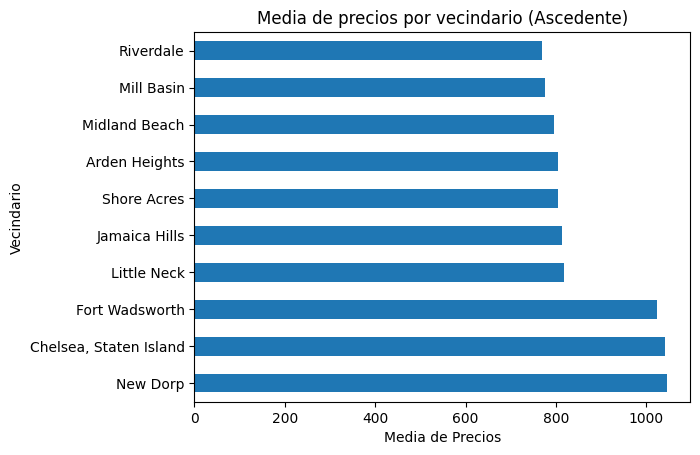

In [233]:
## Importar PyPlot para las visualizaciones
import matplotlib.pyplot as plt

## Visualizar grafico de baras de los 10 barrios más carros
gp[:10].plot(kind ='barh')

plt.xlabel('Media de Precios')
plt.ylabel('Vecindario')
plt.title('Media de precios por vecindario (Ascedente)')
plt.show()

In [234]:
## ¿Cuál es el barrio más barato de los 10 más carros?
print('El barrio más barato de los 10 más carros es:')
gp[9:10]

El barrio más barato de los 10 más carros es:


neighbourhood
Riverdale    768.736842
Name: price, dtype: float64

In [235]:
## ¿Cuál es el barrio más barato de todos los barrios?
print('El barrio más barato de todos los barrios es:')
gp[-1:]


El barrio más barato de todos los barrios es:


neighbourhood
Lighthouse Hill    107.666667
Name: price, dtype: float64

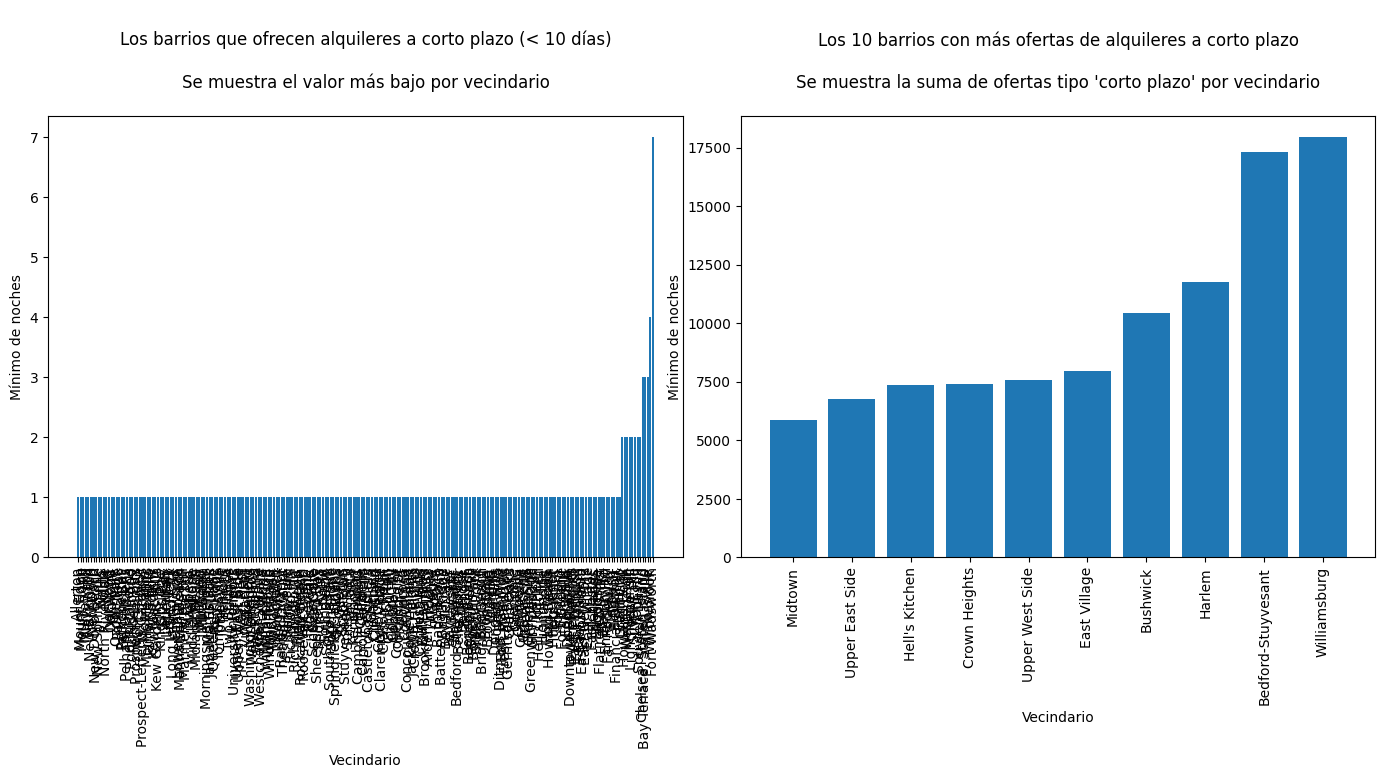

In [238]:
## Enumere los barrios que ofrecen alquileres a corto plazo de menos de 10 días. Ilustrar con un gráfico de barras
import matplotlib.pyplot as plt

# Usar valores absolutos porque en la columna hay datos negativos y este valor no puede ser negativo
df['minimum_nights'] = df['minimum_nights'].abs()

# Filtrar los datos para incluir solo aquellos con 'minimum_nights' menor a 10
short_term_rentals = df[df['minimum_nights'] < 10]
short_term_rentals_2 = df[df['minimum_nights'] < 10]

# Calcular el valor mínimo de 'minimum_nights' para cada barrio
min_nights_by_neighbourhood = short_term_rentals.groupby('neighbourhood')['minimum_nights'].min()
# Calcular la suma de alguileres a corto plazo por barrio
sum_nights_by_neighbourhood = short_term_rentals_2.groupby('neighbourhood')['minimum_nights'].sum()

# Ordenar los resultados de manera ascendente
min_nights_by_neighbourhood_sorted = min_nights_by_neighbourhood.sort_values(ascending=True)
sum_nights_by_neighbourhood_sorted = sum_nights_by_neighbourhood.sort_values(ascending=True)

# Filtrar los 10 barrios con más ofertas de alquileres a corto plazo
sum_nights_by_neighbourhood_sorted_filtered = sum_nights_by_neighbourhood_sorted[-10:]

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
plt.tight_layout()

# Primer gráfico de barras
axes[0].bar(min_nights_by_neighbourhood_sorted.index, min_nights_by_neighbourhood_sorted)
axes[0].set_xlabel('Vecindario')
axes[0].set_ylabel('Mínimo de noches')
axes[0].set_title('\nLos barrios que ofrecen alquileres a corto plazo (< 10 días)\n\nSe muestra el valor más bajo por vecindario\n')
axes[0].tick_params(axis='x', rotation=90)

# Segundo gráfico de barras (mismo que el primero)
axes[1].bar(sum_nights_by_neighbourhood_sorted_filtered.index, sum_nights_by_neighbourhood_sorted_filtered)
axes[1].set_xlabel('Vecindario')
axes[1].set_ylabel('Mínimo de noches')
axes[1].set_title('Los 10 barrios con más ofertas de alquileres a corto plazo\n\nSe muestra la suma de ofertas tipo \'corto plazo\' por vecindario\n')
axes[1].tick_params(axis='x', rotation=90)

# Mostrar los gráficos
plt.show()


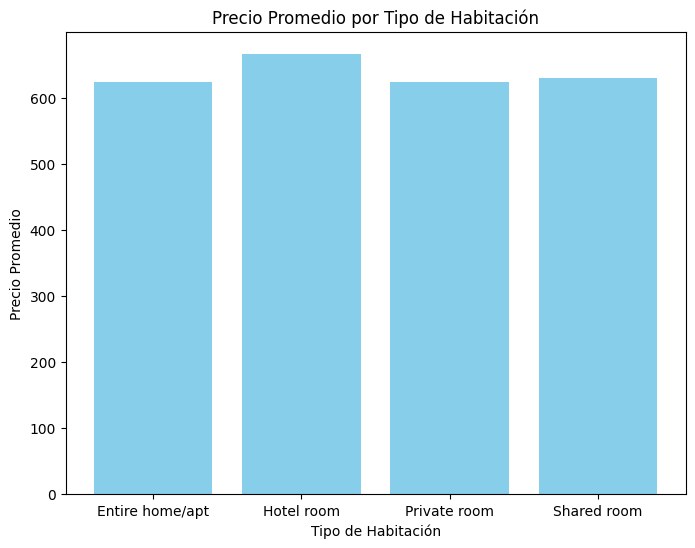

In [128]:
## Enumere los precios con respecto al tipo de habitación utilizando un gráfico de barras y exponga también sus inferencias.
average_prices = df.groupby('room_type')['price'].mean().reset_index()

# Crea un gráfico de barras con escala logarítmica en el eje y
plt.figure(figsize=(8, 6))
plt.bar(average_prices['room_type'], average_prices['price'], color='skyblue')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Tipo de Habitación')

plt.show()



Inferencias:

1. Habitaciones en hotel son más caras.

2. Es sorprendente que los Shared room sean más caros que un piso entero (Entire home), pero después de comprobar vemos que esto está influenciado por el barrio.

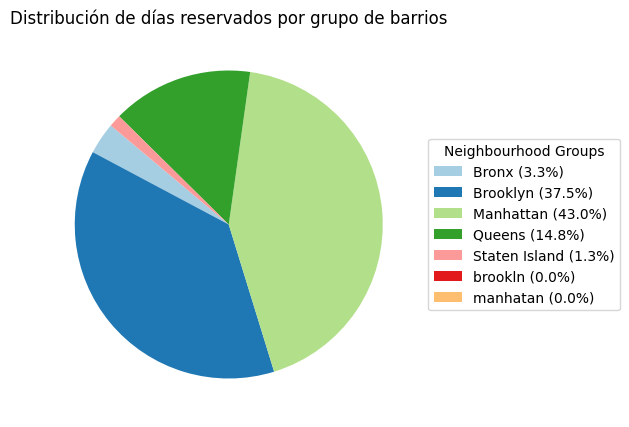

In [129]:
## Cree un gráfico circular que muestre la distribución de los días reservados para cada grupo de barrios.

# Agrupa los datos por 'neighbourhood_group' y suma los días reservados
grouped_data = df.groupby('neighbourhood_group')['days_booked'].sum()

# Crea un gráfico circular
plt.figure(figsize=(5, 5))
pie = plt.pie(grouped_data, labels=None, autopct=None, startangle=140, colors=plt.cm.Paired.colors)

# Calcula los porcentajes y añade un legend con las etiquetas y porcentajes formateados
total_days = grouped_data.sum()
percentages = grouped_data / total_days * 100
legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(grouped_data.index, percentages)]
plt.legend(legend_labels, title='Neighbourhood Groups', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribución de días reservados por grupo de barrios')
plt.show()


## Tarea 5b: Visualización de datos (Cualquier herramienta)

* ¿El precio del servicio y el precio de la habitación tienen un impacto mutuo? Ilustre esta relación con un gráfico de dispersión e indique sus inferencias
* Utilizando un gráfico lineal muestre en qué año tuvo lugar la máxima construcción de habitaciones.

Si utiliza Python para este ejercicio, incluya el código en las celdas siguientes. Si utiliza cualquier otra herramienta, incluya capturas de pantalla de su trabajo.

<Axes: xlabel='service_fee', ylabel='price'>

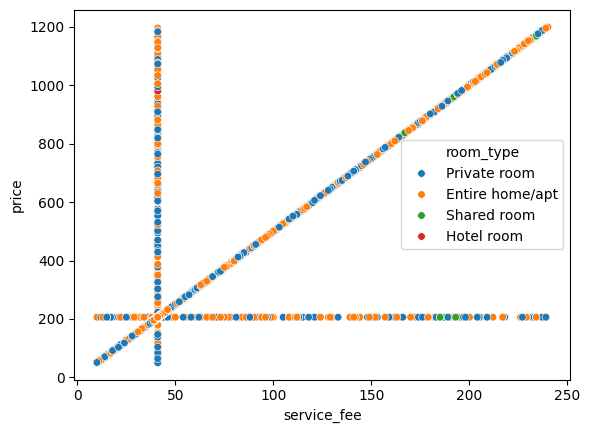

In [239]:
## Grafico de disperción para ilustrar la relación entre el precio del servicio y el precio de la habitación.
import seaborn as sns
sns.scatterplot(data = df, x = "service_fee", y = "price", hue = "room_type", s = 30)

Las colcusiones que puedo sacar de esta grafico y de las pruebas que he hecho filtrando por uno o varios tipos de habitaciones son que hay 3 grupos de casos.
* Los casos en 'service_fee' no influye al 'precio'
* Los casos en que el 'precio' no influye al 'service_fee'
* Los casos en que el aumento del uno esta relacionado con un aumento del otro y vice versa

Filtrando por tipo de habitación vemos que:
* Las habitaciones del tipo **Private room** y **Entire home/apt** están dentro de los tres grupos de casos
* Las habitaciones del tipo **Shared room** y **Hotel room** la gran mayoria de este tipo de habitaciones estan en el tercer grupo de casos

2012.0


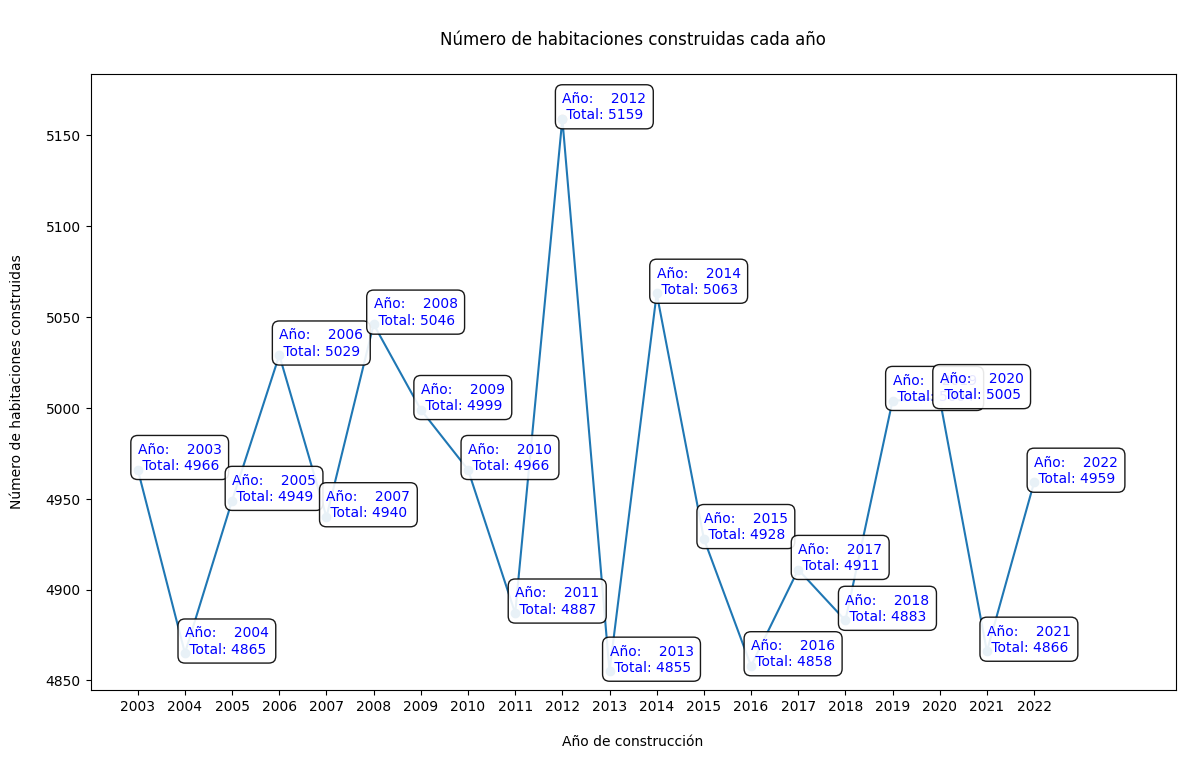

In [248]:
## Utilizando un gráfico lineal muestre en qué año tuvo lugar la máxima construcción de habitaciones.
construction_counts = df.groupby('construction_year').size()
anio_max_construccion = construction_counts.idxmax()
# print(construction_counts.idxmax())
plt.figure(figsize=(14, 8))
plt.plot(construction_counts.index, construction_counts.values, marker='o', linestyle='-')
plt.title('\nNúmero de habitaciones construidas cada año\n')
plt.xlabel('\nAño de construcción')
plt.ylabel('Número de habitaciones construidas\n')


plt.scatter(anio_max_construccion, construccion_por_anio[anio_max_construccion], color='red', label=f'Máxima construcción ({anio_max_construccion})')

plt.xticks(list(map(int, construction_counts.index)))
plt.ylim(min(construction_counts.values) - 10, max(construction_counts.values) + 25)
plt.xlim(min(construction_counts.index) - 1, max(construction_counts.index) + 3)
for year, count in zip(construction_counts.index, construction_counts.values):
    plt.text(year, count + 15, ('Año:    ' + str(int(year)) + '\n Total: ' + str(count)) , ha='left', va='top', color='blue', fontsize=10, bbox=dict(facecolor='white', alpha=0.9, boxstyle='round,pad=0.5'))
plt.show()

## Tarea 5c: Visualización de datos (Cualquier herramienta)

* Con la ayuda de gráficos de caja ilustra lo siguiente
 * Efecto del número de tasa de revisión en el precio
 * Efecto de la identidad del host verificada en el precio

Si utiliza Python para este ejercicio, por favor incluya el código en las celdas de abajo. Si utiliza cualquier otra herramienta, por favor incluya capturas de pantalla de su trabajo.

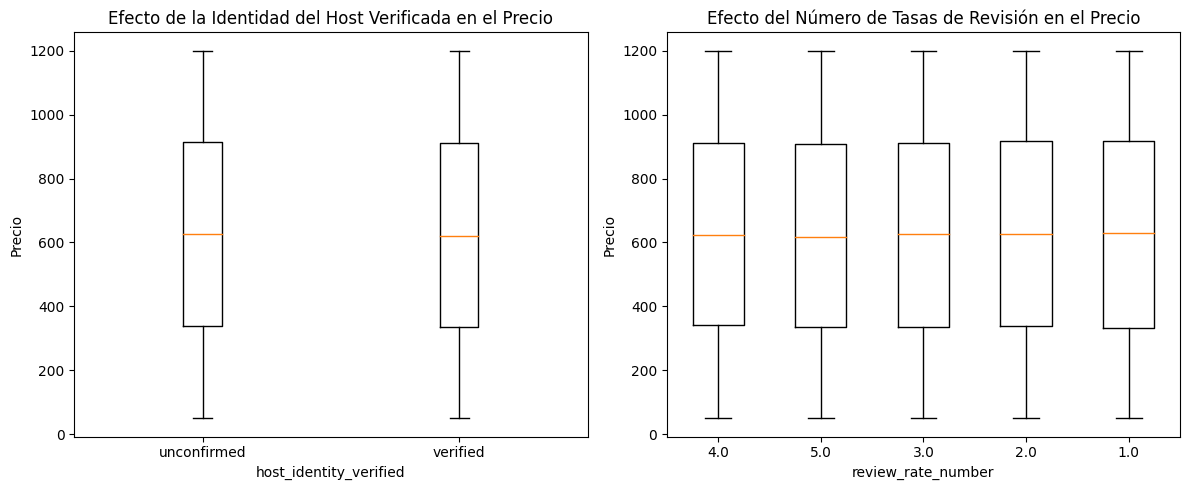

In [243]:
## Con la ayuda de gráficos de caja ilustramos el efecto del número de tasa de revisión en el precio y de la identidad del host verificada en el precio

# Extraer valores unicos de 'host_identity_verified' y 'review_rate_number'
unique_host_verified = df['host_identity_verified'].unique()
unique_review_rate_number = df['review_rate_number'].unique()

# Crear subplots con 2 columnas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Grafico de caja para host_identity_verified
grouped_data_host_verified = [df['price'][df['host_identity_verified'] == rate] for rate in unique_host_verified]
axes[0].boxplot(grouped_data_host_verified, labels=unique_host_verified)
axes[0].set_title('Efecto de la Identidad del Host Verificada en el Precio')
axes[0].set_xlabel('host_identity_verified')
axes[0].set_ylabel('Precio')

# Grafico de caja para review_rate_number
grouped_data_review_rate = [df['price'][df['review_rate_number'] == rate] for rate in unique_review_rate_number]
axes[1].boxplot(grouped_data_review_rate, labels=unique_review_rate_number)
axes[1].set_title('Efecto del Número de Tasas de Revisión en el Precio')
axes[1].set_xlabel('review_rate_number')
axes[1].set_ylabel('Precio')

# Ajustar los especacios
plt.tight_layout()

# Mostrar graficos
plt.show()